# AE simulations
Comparing results of E+ v9.2 to v9.5 where the incident solar angle bug was fixed.

Annual energy and demand data only.

3 vintages, 6 climate zones (NREL's default cities)

In [1]:
# Dependencies
import pandas as pd
import os
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# # 2018 Egrid Costs (elec $/kWh, gas $/therm), change values per city
# gas = 0.83
# elec = 0.1314

---

## Import all csv files

In [3]:
energy92_path = "data/AllEnergy_92.csv"
energy95_path = "data/AllEnergy_95.csv"
demand92_path = "data/AllDemand_92.csv"
demand95_path = "data/AllDemand_95.csv"
energyAll_path = "data/AllEnergy.csv"

In [4]:
energyAll = pd.read_csv(energyAll_path)

In [5]:
energyAll

,Run,Climate,System,Parametric,Heating [kBtu]_92,Cooling [kBtu]_92,Fan [kBtu]_92,Heat [kWh]_92,Cool [kWh]_92,Fan [kWh]_92,...,Cooling [kBtu]_95,Fan [kBtu]_95,Heat [kWh]_95,Cool [kWh]_95,Fan [kWh]_95,U,SHGC,Heat%Diff,Cool%Diff,Fan%Diff
0,1,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,25220.00,14089.00,3307.00,7389.39,4127.99,968.94000,...,14406.00,3368.00,7316.61,4221.03,986.70000,0.1,0.10,-0.987312,2.249982,1.844572
1,2,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,23643.00,16177.00,3798.00,6927.51,4739.98,1112.81000,...,16518.00,3867.00,6870.68,4839.71,1133.11000,0.1,0.25,-0.820539,2.107931,1.816746
2,3,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,22708.00,17683.00,4177.00,6653.42,5181.25,1223.82000,...,18593.00,4366.00,6523.36,5447.70,1279.16000,0.1,0.40,-1.955258,5.146186,4.524779
3,4,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,21711.00,19651.00,4656.00,6361.33,5757.74,1364.15000,...,20746.00,4889.00,6235.11,6078.66,1432.36000,0.1,0.55,-1.985169,5.572236,5.004296
4,5,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,20683.00,22213.00,5264.00,6060.18,6508.37,1542.50000,...,22843.00,5404.00,6005.09,6692.96,1583.38000,0.1,0.70,-0.908959,2.836177,2.659574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,32,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,128161.87,1760.92,3516.04,37551.43,515.90,1030.19972,...,1807.05,3518.20,37478.84,529.50,1030.83260,1.1,0.25,-0.193302,2.619653,0.061433
1292,33,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,122454.67,2589.41,3630.30,35879.22,758.70,1063.67790,...,2699.13,3649.19,35737.91,790.80,1069.21267,1.1,0.40,-0.393844,4.237259,0.520343
1293,34,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,117201.25,3608.64,3870.18,34339.97,1057.30,1133.96274,...,3593.43,3854.46,34363.97,1052.90,1129.35678,1.1,0.55,0.069888,-0.421488,-0.406183
1294,35,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,112694.09,4638.14,4532.28,33019.37,1359.00,1327.95804,...,4630.20,4517.80,33026.14,1356.60,1323.71540,1.1,0.70,0.020516,-0.171189,-0.319486


## Find the percent difference from 9.2 to 9.5

In [6]:
energyAll["HeatingPercentDifference"] = ((energyAll['Heating [kBtu]_95'] - energyAll['Heating [kBtu]_92']) / energyAll['Heating [kBtu]_92']) * 100
energyAll["CoolingPercentDifference"] = ((energyAll['Cooling [kBtu]_95'] - energyAll['Cooling [kBtu]_92']) / energyAll['Cooling [kBtu]_92']) * 100
energyAll["FanPercentDifference"] = ((energyAll['Fan [kBtu]_95'] - energyAll['Fan [kBtu]_92']) / energyAll['Fan [kBtu]_92']) * 100

energyAll

,Run,Climate,System,Parametric,Heating [kBtu]_92,Cooling [kBtu]_92,Fan [kBtu]_92,Heat [kWh]_92,Cool [kWh]_92,Fan [kWh]_92,...,Cool [kWh]_95,Fan [kWh]_95,U,SHGC,Heat%Diff,Cool%Diff,Fan%Diff,HeatingPercentDifference,CoolingPercentDifference,FanPercentDifference
0,1,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,25220.00,14089.00,3307.00,7389.39,4127.99,968.94000,...,4221.03,986.70000,0.1,0.10,-0.987312,2.249982,1.844572,-0.987312,2.249982,1.844572
1,2,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,23643.00,16177.00,3798.00,6927.51,4739.98,1112.81000,...,4839.71,1133.11000,0.1,0.25,-0.820539,2.107931,1.816746,-0.820539,2.107931,1.816746
2,3,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,22708.00,17683.00,4177.00,6653.42,5181.25,1223.82000,...,5447.70,1279.16000,0.1,0.40,-1.955258,5.146186,4.524779,-1.955258,5.146186,4.524779
3,4,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,21711.00,19651.00,4656.00,6361.33,5757.74,1364.15000,...,6078.66,1432.36000,0.1,0.55,-1.985169,5.572236,5.004296,-1.985169,5.572236,5.004296
4,5,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,20683.00,22213.00,5264.00,6060.18,6508.37,1542.50000,...,6692.96,1583.38000,0.1,0.70,-0.908959,2.836177,2.659574,-0.908959,2.836177,2.659574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,32,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,128161.87,1760.92,3516.04,37551.43,515.90,1030.19972,...,529.50,1030.83260,1.1,0.25,-0.193302,2.619653,0.061433,-0.193302,2.619653,0.061433
1292,33,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,122454.67,2589.41,3630.30,35879.22,758.70,1063.67790,...,790.80,1069.21267,1.1,0.40,-0.393844,4.237259,0.520343,-0.393844,4.237259,0.520343
1293,34,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,117201.25,3608.64,3870.18,34339.97,1057.30,1133.96274,...,1052.90,1129.35678,1.1,0.55,0.069888,-0.421488,-0.406183,0.069888,-0.421488,-0.406183
1294,35,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,112694.09,4638.14,4532.28,33019.37,1359.00,1327.95804,...,1356.60,1323.71540,1.1,0.70,0.020516,-0.171189,-0.319486,0.020516,-0.171189,-0.319486


In [7]:
energyAll_group= energyAll.groupby(["Climate", "System"])

# energyAll_group.mean()

## 4A Baltimore 

In [8]:
energy_bwi1990_elec = energyAll[432:468]

energy_bwi2006_elec = energyAll[468:504]

energy_bwi2018_elec = energyAll[504:540]

energy_bwi1990_gas = energyAll[540:576]

energy_bwi2006_gas = energyAll[576:612]

energy_bwi2018_gas = energyAll[612:648]

energy_bwi2018_gas

,Run,Climate,System,Parametric,Heating [kBtu]_92,Cooling [kBtu]_92,Fan [kBtu]_92,Heat [kWh]_92,Cool [kWh]_92,Fan [kWh]_92,...,Cool [kWh]_95,Fan [kWh]_95,U,SHGC,Heat%Diff,Cool%Diff,Fan%Diff,HeatingPercentDifference,CoolingPercentDifference,FanPercentDifference
612,1,4A,Gas,BWI+gasfurnace+slab+IECC_2018_para00001Table.csv,31506.06,4927.63,1670.33,9231.27558,1443.79559,489.40669,...,1509.93,501.87,0.1,0.10,-1.835742,4.580295,2.547401,-1.834758,4.573598,2.554585
613,2,4A,Gas,BWI+gasfurnace+slab+IECC_2018_para00002Table.csv,27531.76,6360.51,2017.50,8066.80568,1863.62943,591.12750,...,1941.17,608.02,0.1,0.25,-1.544543,4.160987,2.857497,-1.542800,4.158314,2.850062
614,3,4A,Gas,BWI+gasfurnace+slab+IECC_2018_para00003Table.csv,25193.04,7463.30,2316.15,7381.56072,2186.74690,678.63195,...,2400.90,725.04,0.1,0.40,-3.550227,9.793389,6.838935,-3.548758,9.790575,6.858364
615,4,4A,Gas,BWI+gasfurnace+slab+IECC_2018_para00004Table.csv,23005.53,9010.86,2716.77,6740.62029,2640.18198,796.01361,...,2913.60,860.07,0.1,0.55,-3.347065,10.356170,8.047056,-3.344978,10.355726,8.032701
616,5,4A,Gas,BWI+gasfurnace+slab+IECC_2018_para00005Table.csv,21067.24,11192.56,3286.04,6172.70132,3279.42008,962.80972,...,3439.79,1001.89,0.1,0.70,-1.459422,4.890302,4.059293,-1.458378,4.891106,4.046208
617,6,4A,Gas,BWI+gasfurnace+slab+IECC_2018_para00006Table.csv,19567.01,13769.39,3971.45,5733.13393,4034.43127,1163.63485,...,3973.91,1149.13,0.1,0.85,0.415700,-1.500066,-1.246648,0.413911,-1.498904,-1.245137
618,7,4A,Gas,BWI+gasfurnace+slab+IECC_2018_para00007Table.csv,40576.16,4727.33,1772.23,11888.81488,1385.10769,519.26339,...,1451.71,532.81,0.3,0.10,-1.697179,4.808634,2.609706,-1.695971,4.816038,2.582622
619,8,4A,Gas,BWI+gasfurnace+slab+IECC_2018_para00008Table.csv,36123.99,6108.51,2137.68,10584.32907,1789.79343,626.34024,...,1866.73,643.85,0.3,0.25,-1.409783,4.298430,2.796022,-1.409008,4.297120,2.774971
620,9,4A,Gas,BWI+gasfurnace+slab+IECC_2018_para00009Table.csv,33487.30,7117.11,2438.70,9811.77890,2085.31323,714.53910,...,2298.73,760.00,0.3,0.40,-3.359064,10.234491,6.362406,-3.360378,10.241376,6.368147
621,10,4A,Gas,BWI+gasfurnace+slab+IECC_2018_para00010Table.csv,30759.64,8590.42,2836.27,9012.57452,2516.99306,831.02711,...,2756.87,887.53,0.3,0.55,-2.946003,9.530267,6.799071,-2.947499,9.528987,6.795192


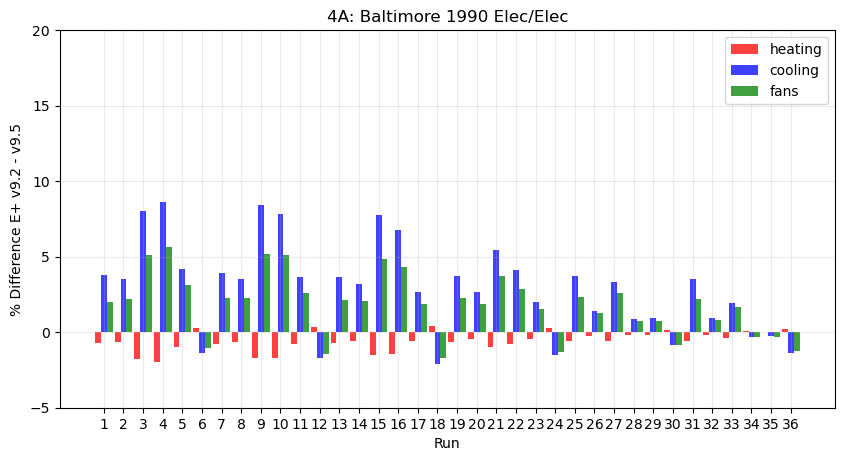

In [9]:
# BWI 1990 elec/elec

x1 = energy_bwi1990_elec["Run"]
heating1 = energy_bwi1990_elec["HeatingPercentDifference"]
cooling1 = energy_bwi1990_elec["CoolingPercentDifference"]
fans1 = energy_bwi1990_elec["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x1-w, heating1, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x1, cooling1, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x1+w, fans1, width=w, color="g", label="fans",  align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("4A: Baltimore 1990 Elec/Elec")
plt.xlabel("Run")
plt.xticks(x1)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/bwi1990elec.png")
plt.show()

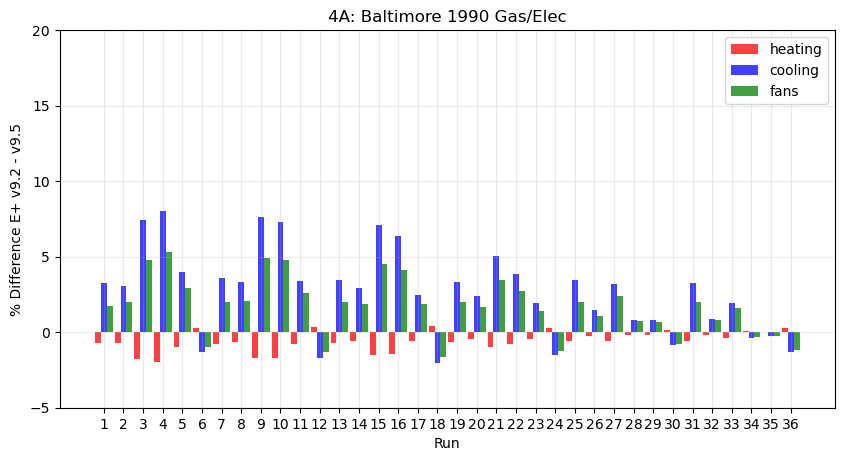

In [10]:
# BWI 1990 gas/elec

x2 = energy_bwi1990_gas["Run"]
heating2 = energy_bwi1990_gas["HeatingPercentDifference"]
cooling2 = energy_bwi1990_gas["CoolingPercentDifference"]
fans2 = energy_bwi1990_gas["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x2-w, heating2, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x2, cooling2, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x2+w, fans2, width=w, color="g", label="fans",  align="center", alpha=.75)


plt.legend()
plt.grid(alpha=.25)
plt.title("4A: Baltimore 1990 Gas/Elec")
plt.xlabel("Run")
plt.xticks(x2)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/bwi1990gas.png")
plt.show()

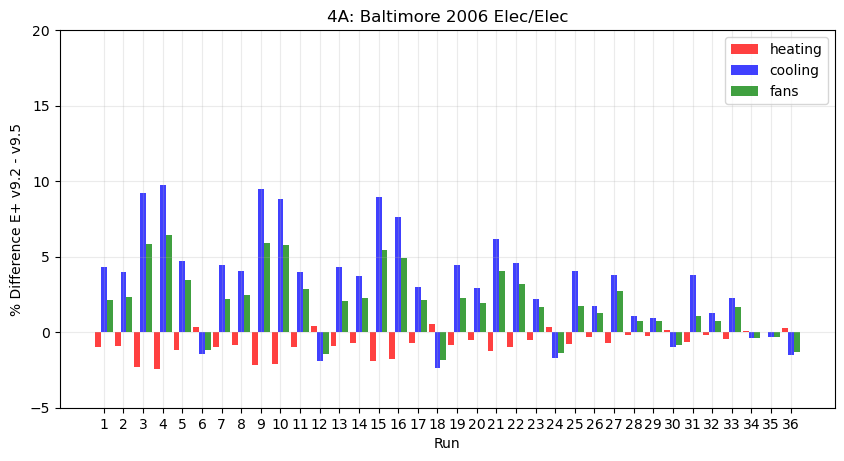

In [11]:
# BWI 2006 elec/elec

x3 = energy_bwi2006_elec["Run"]
heating3 = energy_bwi2006_elec["HeatingPercentDifference"]
cooling3 = energy_bwi2006_elec["CoolingPercentDifference"]
fans3 = energy_bwi2006_elec["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x3-w, heating3, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x3, cooling3, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x3+w, fans3, width=w, color="g", label="fans",  align="center", alpha=.75)


plt.legend()
plt.grid(alpha=.25)
plt.title("4A: Baltimore 2006 Elec/Elec")
plt.xlabel("Run")
plt.xticks(x3)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/bwi2006elec.png")
plt.show()

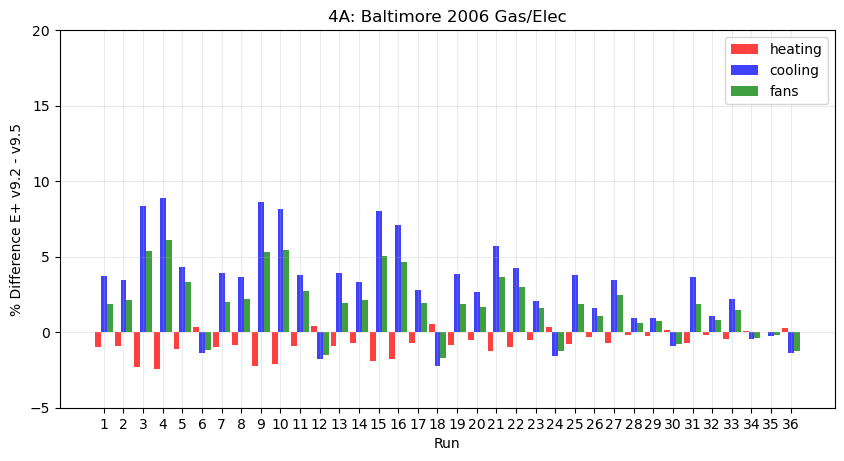

In [12]:
# BWI 2006 gas/elec

x4 = energy_bwi2006_gas["Run"]
heating4 = energy_bwi2006_gas["HeatingPercentDifference"]
cooling4 = energy_bwi2006_gas["CoolingPercentDifference"]
fans4 = energy_bwi2006_gas["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x4-w, heating4, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x4, cooling4, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x4+w, fans4, width=w, color="g", label="fans",  align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("4A: Baltimore 2006 Gas/Elec")
plt.xlabel("Run")
plt.xticks(x4)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/bwi2006gas.png")
plt.show()

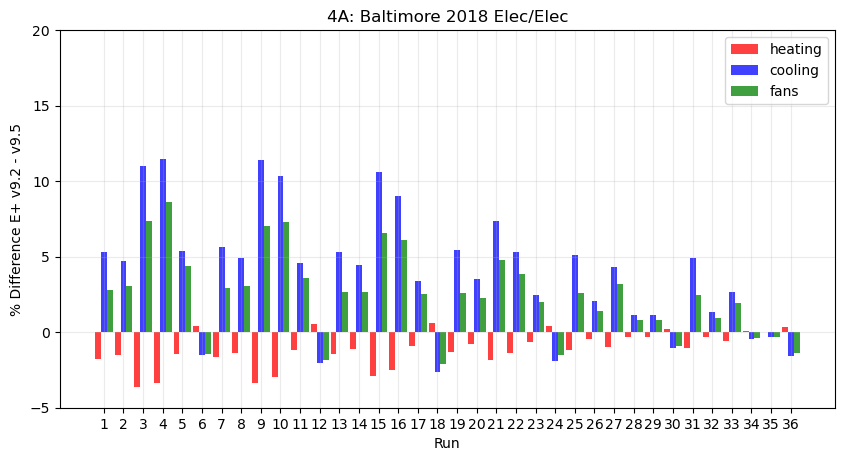

In [13]:
# BWI 2018 elec/elec

x5 = energy_bwi2018_elec["Run"]
heating5 = energy_bwi2018_elec["HeatingPercentDifference"]
cooling5 = energy_bwi2018_elec["CoolingPercentDifference"]
fans5 = energy_bwi2018_elec["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x5-w, heating5, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x5, cooling5, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x5+w, fans5, width=w, color="g", label="fans",  align="center", alpha=.75)


plt.legend()
plt.grid(alpha=.25)
plt.title("4A: Baltimore 2018 Elec/Elec")
plt.xlabel("Run")
plt.xticks(x5)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/bwi2018.png")
plt.show()

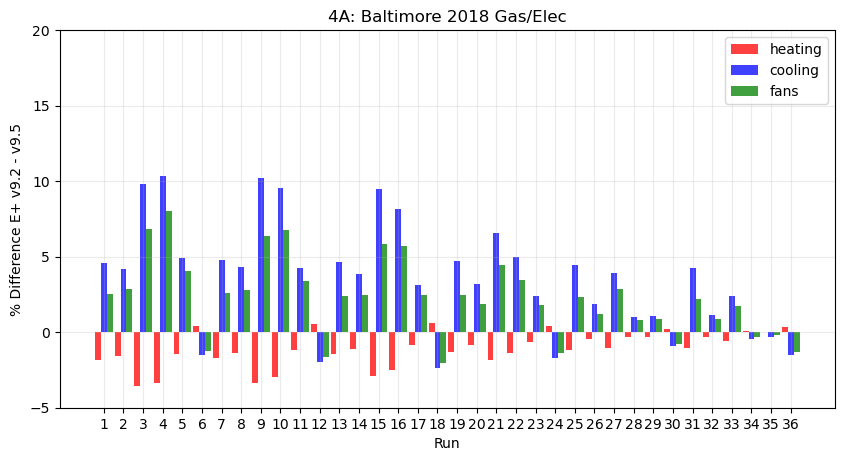

In [14]:
# BWI 2018 gas/elec

x6 = energy_bwi2018_gas["Run"]
heating6 = energy_bwi2018_gas["HeatingPercentDifference"]
cooling6 = energy_bwi2018_gas["CoolingPercentDifference"]
fans6 = energy_bwi2018_gas["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x6-w, heating6, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x6, cooling6, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x6+w, fans6, width=w, color="g", label="fans",  align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("4A: Baltimore 2018 Gas/Elec")
plt.xlabel("Run")
plt.xticks(x6)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/bwi2018gas.png")
plt.show()